# Tips

This notebook contains tips for the final exercise of the CDH entry level Python course at Utrecht University. Participants were asked to think of an analysis that they might want to perform and to submit a description of this analysis in advance of the course. The tips in this notebook were chosen based on those submissions.

There is some overlap with the material that was already discussed during the lectures.

While the notebook is written such that you can read it top to bottom, you are welcome to cherry-pick the topics that interest you. There is a table of contents in the left margin. Some sections contain internal links to other sections.

As a general tip, you can get a complete overview of the Python standard library [over here][python-libs].

[python-libs]: https://docs.python.org/3/library/index.html

## Converting between types

String to int:

In [ ]:
int('123')

Integer to string:

In [ ]:
str(123)

Float to string:

In [ ]:
str(0.5)

String to float:

In [ ]:
float('0.5')

Boolean to string:

In [ ]:
str(True)

String to boolean:

In [ ]:
print('Direct boolean from string does not work:', bool('False'))

# So we have to write a function.
def boolean_from_string(string):
    if string == 'False':
        return False
    else:
        return True

print(boolean_from_string('True'))
print(boolean_from_string('False'))

Integer to float:

In [ ]:
float(123)

Float to integer:

In [ ]:
int(0.5)

## Strings

Strings have a couple of tricks that may be useful for the final exercise. We illustrate them quickly below. A complete overview of all string methods can be found [here](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str).

[`str.startswith`](https://docs.python.org/3/library/stdtypes.html#str.startswith) and [`str.endswith`](https://docs.python.org/3/library/stdtypes.html#str.endswith) will tell you whether a string begins or ends with a particular other string, respectively.

In [ ]:
for word in ['magazine', 'kangaroo', 'rooster', 'broom']:
    if word.startswith('roo'):
        print('"' + word + '" starts with "roo"')
    if word.endswith('roo'):
        print('"' + word + '" ends with "roo"')

[`str.join`](https://docs.python.org/3/library/stdtypes.html#str.join) can glue a sequence of strings together, as we have seen in [9. String manipulation](https://colab.research.google.com/drive/19yTpFfp9uhBb-kAuOmSQY8_LrMtj8Goq#scrollTo=Join_an_iterable_into_a_string).

In [ ]:
print(' + '.join(['1', '2', '3', '4']))
print(', '.join(['do', 're', 'mi', 'fa', 'sol', 'la', 'ti', 'do']))

[`str.split`](https://docs.python.org/3/library/stdtypes.html#str.split) is the opposite of `str.join`: it will split a string by a given separator and return a list with the fragments. If you don't specify a separator, it will split by whitespace.

In [ ]:
print('1 + 2 + 3 + 4'.split(' + '))
print('1 + 2 + 3 + 4'.split('+'))
print('1 + 2 + 3 + 4'.split())
print('1   2   3   4'.split())

['1', '2', '3', '4']
['1 ', ' 2 ', ' 3 ', ' 4']
['1', '+', '2', '+', '3', '+', '4']
['1', '2', '3', '4']


[`str.splitlines`](https://docs.python.org/3/library/stdtypes.html#str.splitlines) is basically `str.split('\n')`, but it cleverly recognizes many types of line endings (which might differ between platforms) and it has an option to keep the line endings in the resulting fragments.

[`str.strip`](https://docs.python.org/3/library/stdtypes.html#str.strip) will return a new string with the whitespace removed from the beginning and end. You can also specify a different set of characters that should be removed. The default mode of removing whitespace is useful for cleaning up text that was downloaded from the internet or that was copypasted from some kind of document.

In [ ]:
"  This string isn't very tidy. ".strip()

### Escapes

There are some characters that normally aren't allowed to appear in a literal string. We can shoehorn them in anyway by placing a backslash `\` in front of the character, or another letter that acts as a placeholder. This is called *escaping* the character. The combination of the backslash and the following character is called an *escape sequence*. Python also uses these escape sequences when echoing raw strings back at us. The following escape sequences occur often:

`\n` - linefeed ("newline") character.

`\r\n` - carriage return plus linefeed. For archeological reasons I will not go into, these two characters together count as a single line separator in Microsoft Windows. So you are likely to find it in files that were created in Windows.

`\t` - tab character.

`\'` - straight single quote (escape not needed in strings delimited by double quotes).

`\"` - straight double quote (escape not needed in strings delimited by single quotes).

`\\` - the backslash itself.

You can get a complete overview of escape sequences if you scroll down from [here](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals).

### Searching for substrings

Searching for a substring within a larger string is a common task, especially in the humanities. [`str.find`](https://docs.python.org/3/library/stdtypes.html#str.find) will tell us the first position in the large string at which the substring is found, or `-1` if it is not found:

In [ ]:
print('kangaroo'.find('roo'))
print('kangaroo'.find('skip'))

`str.find` accepts an optional second argument, which lets us specify the position from which to start searching. We can use this to continue searching for more occurrences after the first match. For example, the following function returns *all* positions of the substring `needle` within the larger string `haystack`:

In [ ]:
def str_find_all(haystack, needle):
    results = []
    position = -1
    # while True lets you repeat the same code "forever"
    while True:
        position = haystack.find(needle, position + 1)
        if position is -1:
            # break lets you "break out" of the infinite loop
            break
        else:
            results.append(position)
    return results

str_find_all('Colorless green ideas sleep furiously', 'e')

With the optional third argument, we can also make `str.find` *stop* searching at a given position. In the example below, `'roo'` is not found in the first four characters of `'kangaroo'`.

In [ ]:
print('kangaroo'.find('roo', 0, 4))

During the lectures, we mentioned a simpler way to search for a substring that only tells you whether the substring appears at all:

In [ ]:
'roo' in 'kangaroo'

### Regular expressions

If you need pattern-based search, [regular expressions](https://docs.python.org/3/library/re.html) are the tool of choice. A regular expression lets you describe a set of similar strings with a single pattern. For example, the following notation will match all occurrences of the word "colour" in a text, even if it is capitalized or spelled "color":

```
[Cc]olou?r
```

The `search` function from the standard module `re` (described by the above link) lets us use such patterns to search through a string:

In [ ]:
import re

re.search('[Cc]olou?r', 'Colorless green ideas sleep furiously')

Regular expressions are a powerful tool and the `re` module has many bells and whistles. Please refer to [the documentation](https://docs.python.org/3/library/re.html) for the details.

### Format strings

A format string is a perfectly normal string that contains some special notation, i.e., pairs of braces `{}`. While the presence of those braces does not oblige us to anything, we *can* use their presence (and insert them on purpose) in order to benefit from the [`str.format`](https://docs.python.org/3/library/stdtypes.html#str.format) method. For example, if I have the following string,

```python
'Ta-da!'
```

I can turn it into a format string simply by inserting a pair of braces, anywhere I like:

```python
'Ta-da: {}'
```

If I call `str.format` on a format string, it will interpret pairs of braces as placeholders and replace them by any arguments that I pass.

In [ ]:
'Ta-da: {}'.format('this is Python!')

'Ta-da: this is Python!'

You can insert as many placeholders and pass as many arguments as you like, as long as there are at least as many arguments as placeholders. Of course, you usually want the number of arguments to exactly match the number of placeholders in the format string, but `str.format` will simply skip any arguments that remain.

In [ ]:
print('Ta-da: {}'.format(1, 2, 3))
print('Ta{}da{} {}'.format('-', ':', 'success!'))

Format strings are a great way to compose strings out of some fixed parts and some variable parts, especially if the fixed parts aren't entirely regular. Consider the following code:

In [ ]:
YELL_START = 'Go go '
YELL_END = '!!!'

def yell(name):
    return YELL_START + name + YELL_END

yell('Jelte')

Using a format string, this code would be a bit more explicit and a bit easier to read and write as well:

In [ ]:
YELL_FORMAT = 'Go go {}!!!'

def yell(name):
    return YELL_FORMAT.format(name)

yell('Jelte')

The above discussion addresses about 90% of all string formatting needs, but for the remaining 10%, `str.format` is chock-full of bells and whistles. You can use named arguments, reuse the same argument in multiple places, align placeholders to a particular width with filler characters of choice, specify how to format numbers, and so forth and so on. You can read all about it [here](https://docs.python.org/3/library/string.html#formatstrings).

### Cross-platform file paths

Consider the location of the current notebook (`Tips.ipynb`). It is located inside a folder called `Colab Notebooks`, which is inside a folder called `My Drive`, which is inside my Google Drive account. In Windows, we write such paths as follows:

    My Drive\Colab Notebooks\Tips.ipynb

In macOS and Linux, on the other hand, we separate the path components with forward slashes:

    My Drive/Colab Notebooks/Tips.ipynb

In Python, we often need to create a string with a file path, which would be different depending on whether the code is running on Windows or elsewhere (backslashes appear twice because they need to be [escaped](#scrollTo=Escapes)):

```py
windows_path = 'My Drive\\Colab Notebooks\\Tips.ipynb'
maclinux_path = 'My Drive/Colab Notebooks/Tips.ipynb'
```

We generally want our code to work on all platforms, without having to change the path notation or having to introduce `if`/`else` statements everywhere to choose between alternative file paths. This is where the standard module [`os.path`][os.path] comes to our rescue. It provides a function called `join`, which glues the path components together with the separator that is appropriate for whatever platform the code is running on:

```py
import os.path as op

crossplatform_path = op.join('My Drive', 'Colab Notebooks', 'Tips.ipynb')
```

The above snippet is repeated in the code cell below. If you run it, you will see that Google Colab runs on a system that uses the same path convention as macOS and Linux.

Besides glueing path components together, [`os.path`][os.path] also provides tools for taking paths apart again and for converting back and forth between absolute and relative paths.

[os.path]: https://docs.python.org/3/library/os.path.html

In [ ]:
import os.path as op

crossplatform_path = op.join('My Drive', 'Colab Notebooks', 'Tips.ipynb')

print(crossplatform_path)

My Drive/Colab Notebooks/Tips.ipynb


## Iterables

Python's `for` loop knows how to take one value at a time out of a generator, just like it knows how to take one value at a time out of a list. We call the more general class of things that `for` can loop over *iterables*. There are many more types of iterables besides lists and generators (including tuples and dictionaries) and `for` is able to deal with all of them, because all iterables follow the same **iterator convention**.

In fact, this convention is not restricted to `for`. Most functions in the Python standard library that work with sequences, accept not just lists but any iterable. We have already seen this in action when we did `list(range(0, 101))`: `list` accepted an iterable, `range(0, 101)`, took out its values one by one, stored all of them in a list, and finally returned that list to you.

Since generators don't store all of their values at the same time and we might not always need all values in a sequence, they are potentially more efficient than lists. For this reason, many standard library functions also *return* generators rather than lists.

By combining functions that consume and return iterables, we can often replace loops by shorter expressions. In the next few subsections, we illustrate the most important functions on iterables.

[range]: https://docs.python.org/3/library/functions.html#func-range

### `filter`

The built-in [`filter`][filter] accepts a function and an iterable. It passes each value in the iterable to the function in a separate call. It returns a generator with only the values in the input sequence for which the function returned `True`.

[filter]: https://docs.python.org/3/library/functions.html#filter

In [ ]:
def odd(number):
    return number % 2 == 1

fibonacci_10 = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

list(filter(odd, fibonacci_10))

For comparison, this is what the last line would look like without `filter`:

In [ ]:
result_list = []
for number in fibonacci_10:
    if odd(number):
        result_list.append(number)
result_list

### `map`

The built-in [`map`][map] accepts a function and an iterable. It passes each value in the iterable as the first argument to the function in a separate call. It returns a generator with the return values of each of those calls.

[map]: https://docs.python.org/3/library/functions.html#map

In [ ]:
def square(number):
    return number ** 2

list(map(square, range(10)))

For comparison, code without `map` that produces the same output as the last line:

In [ ]:
result_list = []
for number in range(10):
    result_list.append(square(number))
result_list

You can also pass multiple iterables to `map`. In that case, `map` will take one value from each iterable per iteration and pass the value from the first iterable as the first argument to the function, the corresponding value from the second iterable as the second argument, and so on. In the following example, we use a [format string](#scrollTo=Format_strings).

In [ ]:
sentence = '{} {} {} {}.'.format

# The following lists have been shuffled.
# For fun, you can try reordering them so the correct words
# from each list match up again. :-)
# (But run the code first so you know what it does.)
properties = ['Gentle', 'Playful', 'Stubborn', 'Thirsty']
people = ['camels', 'plumbers', 'giants', 'children']
verbs = ['tighten', 'devour', 'ruin', 'capture']
objects = ['nightmares', 'massage chairs', 'cactuses', 'rusty fittings']

phrases = map(sentence, properties, people, verbs, objects)
for phrase in phrases:
    print(phrase)

Without `map` (and without `enumerate` or `range`), the last loop would have looked like this instead:

In [ ]:
index = 0
for prop in properties:
    group = people[index]
    verb = verbs[index]
    obj = objects[index]
    print(sentence(prop, group, verb, obj))
    index = index + 1

If you pass iterables of unequal lengths, `map` will stop at the end of the shortest iterable. In the next subsection, we will take a quick look at how this can sometimes be useful.

In [ ]:
# operator.mul is a function that multiplies two numbers. It
# does exactly the same thing as the `*` operator, but as a
# function so you can pass it as an argument to other functions.
# More about the operator module in the next subsection.
from operator import mul

small = [1, 2, 3]
large = [5, 7, 11, 13, 17, 19, 23, 29]

list(map(mul, small, large))

### More built-in functions

`range`, `enumerate`, `filter` and especially `map` are the functions on iterables that you'll be using the most. There are however more built-in functions on iterables worth knowing about. Below, we briefly mention a few.

- [`all`](https://docs.python.org/3/library/functions.html#all) consumes an iterable. If the sequence contains at least one `False` value, it returns `False`. Otherwise it returns `True` (including when it is empty). It's like the `and` operator, but operating on an arbitrary number of operands instead of exactly two.
- [`any`](https://docs.python.org/3/library/functions.html#any) is the exact opposite of `all`: it returns `True` if the sequence contains at least one `True` value, otherwise `False`. Can be thought of as the "long form" of the `or` operator.
- [`len`](https://docs.python.org/3/library/functions.html#len) can tell you the length of lists, strings, and some other iterables that can "know" their size in advance, including `range`.
- [`list`](https://docs.python.org/3/library/functions.html#func-list), as we have seen in previous examples, can store the values from any iterable into a list.
- [`max`](https://docs.python.org/3/library/functions.html#max) can be passed a single iterable argument, in which case it will return the maximum value of the sequence. You can however also pass multiple arguments, in which case it will simply compare them directly (e.g. `max(range(10))` will return `9` and `max(3, 4)` will return `4`). Likewise for [`min`](https://docs.python.org/3/library/functions.html#min).
- [`str.join`](https://docs.python.org/3/library/stdtypes.html#str.join), which I covered in more detail in [Strings](#scrollTo=Strings), can take the strings that it will glue together from any iterable sequence.
- [`sum`](https://docs.python.org/3/library/functions.html#sum), as the name suggests, will return the sum of all values in an iterable sequence.

### Operators

Given two lists of numbers, we might want to create a third list where each element is the sum of the correponding elements of the first two lists. We cannot pass the `+` operator to `map`, because the `+` operator is not a function:

In [ ]:
first_list = [1, 2, 3]
second_list = [7, 7, 5]

list(map(+, first_list, second_list))

Fortunately, the [`operator`](https://docs.python.org/3/library/operator.html) standard module exports function versions of most operators, so we can do this instead:

In [ ]:
from operator import add

first_list = [1, 2, 3]
second_list = [7, 7, 5]

list(map(add, first_list, second_list))

The operators that you would most likely use this way, and their corresponding functions exported from `operator`, are the following (full list [here](https://docs.python.org/3/library/operator.html#mapping-operators-to-functions)):

`+` - `add` (for adding numbers)

`+` - `concat` (for concatenating strings or lists)

`-` - `neg` (unary minus to flip the sign of a number)

`-` - `sub` (binary minus to subtract two numbers)

`in` - `contains` (for checking whether a value appears in an iterable)

`*` - `mul`

`/` - `truediv` (`//` is `floordiv`)

`%` - `mod`

`**` - `pow`

`<` - `lt`

`>` - `gt`

`==` - `eq`

`!=` - `ne`

### Bound methods

In the `map` subsection, I used an [example](#scrollTo=5W6NwA8D2Kz3&line=1&uniqifier=1) with the notation `'{} {} {} {}.'.format`. I stored that in a variable and then passed that as a function to `map`. We have seen something similar in [exercise 9.3.3](https://colab.research.google.com/drive/19yTpFfp9uhBb-kAuOmSQY8_LrMtj8Goq#scrollTo=ArVJo3y0jJ8T). It turns out this is a general thing we can do in more situations, so let's briefly touch on how this works.

The essence is that

In [ ]:
'{} {} {} {}.'.format(1, 2, 3, 4)

is equivalent to

In [ ]:
str.format('{} {} {} {}.', 1, 2, 3, 4)

We generally use the first form because it is more convenient, but Python is actually translating it to the second form behind our backs. The [format string](#scrollTo=Format_strings) `'{} {} {} {}.'` is being passed as the first argument to the function `str.format` in both cases.

If we do `'{} {} {} {}.'.format` without actually calling the function and passing an argument list, Python understands that we want to use `'{} {} {} {}.'` as the first argument when we later make the call. It returns a special, *bound* version of `str.format` that already has our format string filled in, so we only need to supply the remaining arguments. This is a special form of *partial application* (we will see the more general form of partial application in the [next subsection](#scrollTo=partial)). Python's support for this special form has something to do with classes and objects, which you can optionally read more about in [a later section](#scrollTo=Classes_and_objects).

With this theory out of the way, let's look at a couple more examples of how we can use both bound and unbound functions in `map` and similar functions. We use [string](#scrollTo=Strings) and [dictionary](#scrollTo=Dictionaries) functions in this example.

In [ ]:
# We can map the unbound str.lower to lowercase a sequence of strings.
strings = ['Hawaii', 'Iceland', 'Hokkaido', 'Vanuatu']
print(list(map(str.lower, strings)))

# We can filter by the bound dict.get to check for associated values.
topography = {
    'Iceland': 'volcanic',
    'Vanuatu': 'Melanesia',
}
# Give me only the islands I know something about.
print(list(filter(topography.get, strings)))

With bound methods, we can achieve ultimate minimalism in our [example](#scrollTo=fwTdCa4QSOuv&line=1&uniqifier=1) from the format strings section, repeated here:

In [ ]:
YELL_FORMAT = 'Go go {}!!!'

def yell(name):
    return YELL_FORMAT.format(name)

yell('Jelte')

because we can suffice with this:

In [ ]:
yell = 'Go go {}!!!'.format

yell('Jelte')

### `itertools` and `functools`

The [`itertools`](https://docs.python.org/3/library/itertools.html) and [`functools`](https://docs.python.org/3/library/functools.html) standard modules let you turn your iterable-fu up to 11. Most of the contents of these modules are a bit advanced, but there are a couple of tricks in there that might be useful during the final exercise. We quickly illustrate them below.

#### `repeat`

[`itertools.repeat`](https://docs.python.org/3/library/itertools.html#itertools.repeat), as the name suggests, will keep repeating a value that you specify. *Forever*. That means you should definitely not try to loop over it! However, you can use it when you need to `map` a function that takes multiple arguments, where some arguments come from a (finite) iterable sequence while at least one argument is the same every time. Consider the following example code, which prints a triangle of stars:

In [ ]:
def centered_stars(center, width):
    padding = center - width // 2
    return ' ' * padding + '*' * width

lines = []
for width in range(1, 6, 2):
    lines.append(centered_stars(2, width))

print('\n'.join(lines))

We can replace the loop by an expression using `map` and `repeat`:

In [ ]:
from itertools import repeat

lines = map(centered_stars, repeat(2), range(1, 6, 2))

print('\n'.join(lines))

#### `partial`

[`functools.partial`](https://docs.python.org/3/library/functools.html#functools.partial) takes a function plus any number of other arguments, and then returns a new version of the function to which those arguments have already been applied.

In [ ]:
from functools import partial

# center_2_stars is a version of centered_stars when the first
# parameter (`center`) is fixed to the value 2. This version
# accepts only one argument, `width`.
center_2_stars = partial(centered_stars, 2)

center_2_stars(3)

While `functools.partial` does not operate on iterables by itself, it can be really useful when you want to adjust functions before you pass them to `filter`, `map` and the like. We could have used it instead of `itertools.repeat` to eliminate the loop from our triangle example:

In [ ]:
lines = map(center_2_stars, range(1, 6, 2))

print('\n'.join(lines))

`partial` also works with keyword arguments. In some cases, this makes it possible to partially apply arguments out of order. This doesn't work for the operators, but there are some workarounds possible. Consider writing a function that subtracts `3` from whatever number you pass to it:

In [ ]:
def minus_3(number):
    return number - 3

minus_3(4)

It would be nice if we could skip writing a function ourselves and instead just combine `operator.sub` with `functools.partial`.

In [ ]:
from operator import sub
from functools import partial

minus_3 = partial(sub, b=3)

minus_3(4)

The above code doesn't work, but we can avoid the problem by adding `-3` instead of subtracting `+3`:

In [ ]:
from operator import add
from functools import partial

minus_3 = partial(add, -3)

minus_3(4)

#### `reduce`

[`functools.reduce`](https://docs.python.org/3/library/functools.html#functools.reduce) is for when you want to combine (or *reduce*) all values from a sequence to a single value. It accepts a function, an iterable and an optional starting value. If you don't supply a starting value, it will use the first value in the sequence instead.

`reduce` keeps a work-in-progress value of sorts, which is often called the *accumulator*. The accumulator is initially set to the starting value. For every remaining value in the iterable sequence, `reduce` calls the function with two arguments: the accumulator and the value itself. The return value from the function becomes the new accumulator. After the last value in the sequence, the latest accumulator is returned as the final result.

For illustration, here is how you might use `reduce` to reverse a string:

In [ ]:
from functools import reduce

def prepend_letter(accumulator, next_letter):
    return next_letter + accumulator

def reverse_string(string):
    # In this case, we reduce a sequence of characters to a new string.
    return reduce(prepend_letter, string)

reverse_string('abcdef')

And here is how we could write our own implementations of the built-in functions `max` and `sum` using `reduce`:

In [ ]:
from functools import reduce
from operator import add

def greater(a, b):
    if a < b:
        return b
    else:
        return a

def max(iterable):
    return reduce(greater, iterable)

def sum(iterable):
    return reduce(add, iterable)

numbers = [3, 5, 4]

print('max:', max(numbers))
print('sum:', sum(numbers))

## Calculations

As we have written in the course manual, Python is "batteries included"&mdash;it comes with a lot of functionality out of the box. This is certainly also the case for numerical computations and even some basic statistics. We highlight some common tools below.

- The built-in functions [`abs`][abs], [`max`][max], [`min`][min], [`pow`][pow], [`round`][round] and [`sum`][sum] do exactly what the names suggest. You can also use the `**` operator for powers.
- The built-in [`range`][range] function, which we have seen before, lets you generate linear series of numbers.
- The [`math`][math] standard module contains a wealth of general mathematical functions and constants, such as [`log`][math.log], [`sqrt`][math.sqrt], [`cos`][math.cos], [`pi`][math.pi] and [`tau`][math.tau].
- The [`random`][random] standard module covers most random number generating needs, as well as random shuffling and sampling.
- The [`statistics`][statistics] standard module includes the common staples of statistical analysis, such as [`mean`][statistics.mean], [`median`][statistics.median], [`mode`][statistics.mode], [`stdev`][statistics.stdev], [`variance`][statistics.variance], [`covariance`][statistics.covariance], [`correlation`][statistics.correlation] and even a simple [`linear_regression`][statistics.linear_regression]. ~~Unfortunately, however, the latter three are not available in Google Colab, because they were only recently added to the Python standard library and Colab is not running the latest ("bleeding edge") version of Python. The next two subsections offer some alternatives.~~

A complete overview of numerical functionality in the Python standard library can be found [here][python-numeric].

[abs]: https://docs.python.org/3/library/functions.html#abs
[max]: https://docs.python.org/3/library/functions.html#max
[min]: https://docs.python.org/3/library/functions.html#min
[pow]: https://docs.python.org/3/library/functions.html#pow
[range]: https://docs.python.org/3/library/functions.html#func-range
[round]: https://docs.python.org/3/library/functions.html#round
[sum]: https://docs.python.org/3/library/functions.html#sum
[math]: https://docs.python.org/3/library/math.html
[math.log]: https://docs.python.org/3/library/math.html#math.log
[math.sqrt]: https://docs.python.org/3/library/math.html#math.sqrt
[math.cos]: https://docs.python.org/3/library/math.html#math.cos
[math.pi]: https://docs.python.org/3/library/math.html#math.pi
[math.tau]: https://docs.python.org/3/library/math.html#math.tau
[random]: https://docs.python.org/3/library/random.html
[statistics]: https://docs.python.org/3/library/statistics.html
[statistics.mean]: https://docs.python.org/3/library/statistics.html#statistics.mean
[statistics.median]: https://docs.python.org/3/library/statistics.html#statistics.median
[statistics.mode]: https://docs.python.org/3/library/statistics.html#statistics.mode
[statistics.stdev]: https://docs.python.org/3/library/statistics.html#statistics.stdev
[statistics.variance]: https://docs.python.org/3/library/statistics.html#statistics.variance
[statistics.covariance]: https://docs.python.org/3/library/statistics.html#statistics.covariance
[statistics.correlation]: https://docs.python.org/3/library/statistics.html#statistics.correlation
[statistics.linear_regression]: https://docs.python.org/3/library/statistics.html#statistics.linear_regression
[python-numeric]: https://docs.python.org/3/library/numeric.html

In [2]:
!python --version

Python 3.10.12


### Computing covariance and correlation yourself

Given two equally long sequences of numbers and their averages (which you might have already computed because you needed them elsewhere), you can compute the sample covariance and correlation as follows using [iterables](#scrollTo=Iterables):

In [ ]:
from itertools import repeat
from operator import sub, mul
from statistics import mean, stdev

def differences(series, average):
    return map(sub, series, repeat(average))

def covariance(series1, series2, average1=None, average2=None):
    differences1 = differences(series1, average1 or mean(series1))
    differences2 = differences(series2, average2 or mean(series2))
    products = map(mul, differences1, differences2)
    return sum(products) / (len(series1) - 1)

def correlation(series1, series2, average1=None, average2=None):
    '''Pearson's correlation coefficient.'''
    cov = covariance(series1, series2, average1, average2)
    stdev1 = stdev(series1, average1)
    stdev2 = stdev(series2, average2)
    return cov / (stdev1 * stdev2)

column1 = [1, 2, 3, 4, 5, 6, 7]
column2 = [4, 5, 6, 5, 5, 8, 9]
column3 = [8, 7, 6, 5, 4, 3, 2]

print('covariance 1-2:', covariance(column1, column2))
print('correlation 1-2:', correlation(column1, column2))
print('correlation 2-1:', correlation(column2, column1))
print('correlation 1-3:', correlation(column1, column3))
print('correlation 2-3:', correlation(column2, column3))

### Using covariance and correlation from an external package

[pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) provides implementations of [covariance](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#covariance), [correlation](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#correlation) and many other statistical functions. If you want to do serious statistics, you should probably use pandas or some other third-party package that can do the heavy lifting for you. If you choose this path, head over to [dataframes](#scrollTo=pandas_dataframes_and_read_csv) first.

## Classes and objects

For the final exercise, you do not need to create your own classes. However, since you may encounter the terminology and the notation when using third-party packages, here is a *very* quick explanation.

An **object** is a value with internal structure. For example, I might have a variable with the name `jack` that holds a description of my friend Jack. The parts of that description are called its **attributes**. In this example, `jack.name` might hold the string `'Jack'` and `jack.phone` might hold the string `'+31612345678'` (not his real phone number ;-). `jack` is the object and `name` and `phone` are its attributes.

Attributes can hold all types of values, including functions. In the latter case, the attribute is also called a **method**. For example, `jack.call()` might dial Jack's number. Attributes might also themselves be objects with their own nested attributes, so you can have chains of names connected with dots, for example `house.kitchen.sink`. In the latter dotted name, `kitchen` and `sink` are both attributes, and `house` and `kitchen` must both be objects, though `sink` might be an object as well.

Whenever you see two names connected with a dot, the left one must be an object. You have already encountered a few types of objects. Every list has an `.append()` method, so lists are objects. When you call `csv.reader()`, the `csv` module is an object (though we usually don't use the words "attribute" and "method" to refer to the parts of a module; we rather say that `csv.reader` is a *qualified name*). In fact, *nearly everything* in Python is an object; this is why it is called an *object-oriented* programming language.

Objects are generally created using a **class**. You can think of a class as a template for creating objects of a particular shape. For example, our `jack` object might have been created using the `Person` class. We say that `jack` is an **instance** of `Person` and also that we **instantiated** `Person` when we created `jack`. Typically, you can expect all instances of a class to have the same attributes and methods. Packages often organize their documentation by class, listing the methods of its instances and their usage.

Instantiating a class looks exactly like calling a function and storing the return value in a variable. The only visible clue that you're instantiating a class rather than calling a function, is that classes usually have a name starting with an uppercase letter:

```py
jack = Person(name='Jack')
```

There is no danger in thinking of a class instantiation as a function call, or in instantiating a class without knowing it because its name starts with a lowercase letter. In reality, however, a class is not a function but an object!

## Working with times and calendar dates

The [`datetime`][datetime] standard module provides tools for working with dates and times. It exports the `date`, `time` and `datetime` [classes](#scrollTo=Classes_and_objects), which let you represent a date, a time or both, exactly as the names suggest.

[datetime]: https://docs.python.org/3/library/datetime.html

### Parsing dates from text

If you are working with dates for the final course exercise, it is most likely that you are extracting date strings from a CSV. Such a string might, for example, look like `'2021/11/15'`. In some cases, you may need to extract specific information from those dates, such as the year, month, hour or even weekday. For such use cases, it is advisable to convert the date string to a `date`, `time` or `datetime` object first by *parsing* it.

The [`datetime.strptime`][datetime.strptime] function can do this job for you. It takes two parameters: the date string that needs to be parsed, and a second string that describes the *format* of the date. Our example above consisted of four digits that identify the year, a slash, two digits that identify the month, another slash, and finally two digits that identify the day of the month. We write that as `'%Y/%m/%d'`. In such a format string, a `%` with a letter after it is a placeholder for a particular piece of the date or time, while all other characters simply represent themselves. You can find a list of all available placeholders [here][datetime-formats].

[datetime.strptime]: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
[datetime-formats]: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [ ]:
from datetime import datetime as dt

yesterday_str = '2021/11/15'
date_format = '%Y/%m/%d'

yesterday_obj = dt.strptime(yesterday_str, date_format)
print('datetime:', yesterday_obj)

# dt.strptime always returns a full datetime, even if the input
# string and the format string contain only a date or only a time.
# You can reduce the datetime object to just a date or just a time
# by calling a method of the same name:
print('date:    ', yesterday_obj.date())
print('time:    ', yesterday_obj.time())

### Extracting information from date and time objects

Once you have a `date`, `time`, or `datetime` object, extracting information from it is very easy, as we demonstrate below. [`datetime`][datetime.datetime] objects have all date-related attributes and methods of `date` as well as all time-related attributes and methods of `time`. You can find the most important attributes [here][datetime-attributes] and the most important methods [here][datetime-methods] (you can also scroll up from the latter link for some additional methods related to time zones).

[datetime.datetime]: https://docs.python.org/3/library/datetime.html#datetime-objects
[datetime-attributes]: https://docs.python.org/3/library/datetime.html#datetime.datetime.year
[datetime-methods]: https://docs.python.org/3/library/datetime.html#datetime.datetime.utcoffset

In [ ]:
# Year, month etcetera attributes are all represented as numbers.
print('year:      ', yesterday_obj.year)
print('month:     ', yesterday_obj.month)
print('hour:      ', yesterday_obj.hour)

# Python starts the week on Monday and starts numbering at zero.
print('weekday:   ', yesterday_obj.weekday())
# The ISO 8601 standard also starts on Monday, but starts numbering at one.
print('isoweekday:', yesterday_obj.isoweekday())

## Sorting

Python has a built-in function [`sorted`][sorted], which can sort anything that you can loop over (including the key-value pairs of a [dictionary](#scrollTo=Dictionaries)). It always returns a list with the result.

By default, it will sort ascending, i.e., by increasing order of magnitude. Numbers are compared by value, strings are compared lexicographically (with all uppercase letters sorting before all lowercase letters), and lists are compared by the first item, with subsequent items being used as tie breakers if previous items compared equal.

[sorted]: https://docs.python.org/3/library/functions.html#sorted
[sorting-howto]: https://docs.python.org/3/howto/sorting.html#sortinghowto

In [ ]:
list_of_numbers = [5, 3, 4]
list_of_strings = ['Good', 'day', 'to', 'you']
list_of_lists = [
    [6, 'zucchini'],
    [5, 'eggs'],
    [6, 'broccoli'],
]

print(sorted(list_of_numbers))
print(sorted(list_of_strings))
print(sorted(list_of_lists))

### Sorting in descending order

If you want to sort descending instead, pass the named argument `reverse=True`.

In [ ]:
sorted(list_of_numbers, reverse=True)

### Custom comparison

If you want `sorted` to perform a different kind of comparison in order to decide on the order of the items, you can pass a function as the named `key` argument. This function should take one item as its parameter and return a new value that `sorted` will use for the comparison instead.

Below, we use the function `str.lower` to do a case-insensitive sort:

In [ ]:
sorted(list_of_strings, key=str.lower)

['day', 'Good', 'to', 'you']

The [`operator`][operator] standard module exports several useful functions that let you create instant simple functions for the purpose of sorting. Most importantly, [`itemgetter`][operator.itemgetter] lets you sort sequences by a different item than the first and [`attrgetter`][operator.attrgetter] lets you sort [objects](#scrollTo=Classes_and_objects) by a particular attribute. There is also [`methodcaller`][operator.methodcaller] which lets you sort by the result of a method call.

Below, we use `itemgetter` to sort the key-value pairs of a dictionary by value instead of by key:

[operator]: https://docs.python.org/3/library/operator.html#module-operator
[operator.itemgetter]: https://docs.python.org/3/library/operator.html#operator.itemgetter
[operator.attrgetter]: https://docs.python.org/3/library/operator.html#operator.attrgetter
[operator.methodcaller]: https://docs.python.org/3/library/operator.html#operator.methodcaller

In [ ]:
from operator import itemgetter

example_dict = {'banana': 'yellow', 'cherry': 'sweet', 'date': 'wrinkly'}

sorted(example_dict.items(), key=itemgetter(1))

And below, we use `attrgetter` to sort [dates](#scrollTo=Working_with_times_and_calendar_dates) by month:

In [ ]:
from operator import attrgetter
from datetime import date

list_of_dates = [
    date(year=2021, month=11, day=16),
    date(year=2022, month=3, day=17),
    date(year=2020, month=5, day=18),
]

sorted(list_of_dates, key=attrgetter('month'))

## `pandas` dataframes and `read_csv`

[pandas][pandas] is a package that provides general data structures and data analysis tools for Python. If you venture into statistics or datamining with Python, it is likely that you will sooner or later encounter [`pandas.DataFrame`][pandas.DataFrame] (which is a [class](#scrollTo=Classes_and_objects)). It holds tabular data in which each column might have a different type. Other packages often use this data structure, too.

If you encounter `pandas` during the final course exercise, it is probably because you are using a function from a third-party package that expects you to pass in the data as a `DataFrame`. In this case, it is useful to know that `pandas` provides the [`read_csv`][pandas.read_csv] function. It accepts a file or file name as its first parameter and returns the contents of the CSV file as a `DataFrame`. You can then pass this object to the function that expects a `DataFrame`. The `read_csv` function also accepts a couple of optional parameters that let you specify details about the way the CSV file is formatted, its columns, etcetera.

In the example code below, we illustrate how you can create a `DataFrame` using `read_csv`. Note that we define a [cross-platform path](#scrollTo=Cross_platform_file_paths) using [`os.path`](https://docs.python.org/3/library/os.path.html). In the [next section](#scrollTo=Clustering_with_scikit_learn), we illustrate how the `data` object may be passed to a third-party analysis function.

[pandas]: https://pandas.pydata.org/pandas-docs/stable/index.html
[pandas.DataFrame]: https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe
[pandas.read_csv]: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table

In [ ]:
#requires pandas

import os.path as op
import pandas

file_path = op.join('sample_data', 'california_housing_test.csv')

data = pandas.read_csv(file_path)
# `data` is an instance of pandas.DataFrame with several columns
# containing geographic center points of neighborhoods in
# California as well as demographics about the inhabitants and
# their houses.

# You may sometimes want to pass only a subset of the dataset
# to a function. For this purpose, dataframes can be sliced in
# a way that is similar to lists. The following example will
# contain only the 'total_rooms' column:
data.loc[:, 'total_rooms']

# The following example will include two columns, in a different
# order than they appeared in the CSV:
data.loc[:, ['households', 'population']]
# You can also use this notation if you want to use a subset of
# multiple columns.

# For slicing rows by position, you use the `iloc` attribute
# instead of `loc`:
data.iloc[0:3]

# Both ways of slicing can be combined:
data.loc[:, ['households', 'population']].iloc[0:3]

,households,population
0,606.0,1537.0
1,277.0,809.0
2,495.0,1484.0


## Visualizing data with `matplotlib`

[`matplotlib`](https://matplotlib.org) is a comprehensive and easy to use package for creating data graphics. It is preinstalled on Google Colab, so you can use it right away. Here is a quick example:

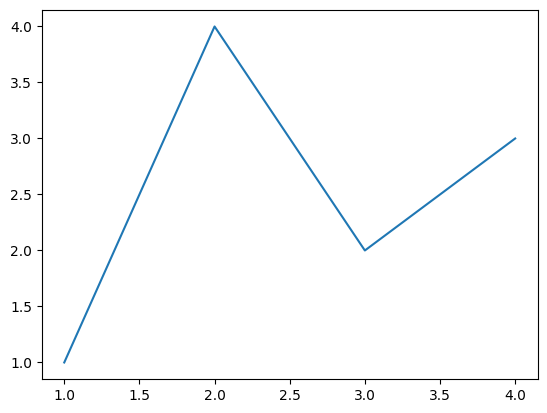

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

The above example was shamelessly copied from `matplotlib`'s [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html), which is the best place to start learning how to use the package yourself.

## Statistical modeling with `statsmodels`

Compared to special purpose languages such as R and SAS, Python is a little bit under-equipped when it comes to statistical modeling. Fortunately, [statsmodels](https://www.statsmodels.org/) is a comprehensive package that covers many modeling needs. It builds on top of [pandas](#scrollTo=pandas_dataframes_and_read_csv).

Like most packages discussed in this notebook, statsmodels is preinstalled in Google Colab. You can import it as `statsmodels`. See the [API reference](https://www.statsmodels.org/stable/api.html) for a complete list of the types of statistical models that it support.



## Clustering with scikit-learn

[scikit-learn][sklearn] is a package that provides many data mining and machine learning tools, including cluster analysis. You can find the documentation [here][sklearn.cluster]. We give a very minimal example of hierarchical clustering with Ward linkage below. You can find a more extensive example [here][sklearn-example]. Note that we are using the `data` object, which is a `pandas.DataFrame`, from the [pandas section](#scrollTo=pandas_dataframes_and_read_csv).

[sklearn]: https://scikit-learn.org/stable/index.html
[sklearn.cluster]: https://scikit-learn.org/stable/modules/clustering.html
[sklearn-example]: https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py

In [ ]:
#requires sklearn

from sklearn.cluster import AgglomerativeClustering

# We start by creating the object that will *eventually* contain
# the clustering.
clustering = AgglomerativeClustering()
# Next, we feed in the data through the `fit` method. We will
# cluster the neighborhoods by geographical location.
clustering.fit(data.loc[:, ['latitude', 'longitude']])
# The clustering is now established. We illustrate below by
# printing the cluster assignment of the first 20 rows in the
# dataset.
print(clustering.labels_[:20])
# In a more serious application, we would probably inspect the
# cluster dendrogram or plot the data with a coloring to indicate
# the cluster assignment of each data point. The scikit-learn
# documentation explains how to do such things.

[1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1]


## Parsing XML and HTML

In the humanities, data are often stored in XML format, for example [TEI](https://en.wikipedia.org/wiki/Text_Encoding_Initiative). XML is a more complicated format than CSV, so extracting information from it is also a bit more involved.

Another, similar format is HTML, the language that web pages are written in. You may encounter this when scraping the web; more about this in [the next section](#scrollTo=lEy6U7SF-uFe).

XML and HTML can both be parsed (and written) using [Beautiful Soup](https://beautiful-soup-4.readthedocs.io/en/latest/). It is preinstalled in Google Colab and can be imported by the name `bs4`.

## Fetching information from the internet

[Requests](https://docs.python-requests.org/en/latest/) lets you fetch information from the internet, similar to how your browser might view or download information from a particular web address. It is a Python alternative to the command line program `curl` or the graphical program Postman, if you happen to know either.

The package is preinstalled on Google Colab and can be imported as `requests`. How to do this is explained in the [Quickstart](https://docs.python-requests.org/en/latest/user/quickstart/). You can use Beautiful Soup for parsing HTML and XML responses, as explained in [the previous section](#scrollTo=hofJ0jOJ-fKo&line=7&uniqifier=1).

## Network visualizations

[This article](https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259) lists four packages that you could use to visualize networks. Most of them can interface with [pandas](#scrollTo=pandas_dataframes_and_read_csv).

## Natural language processing

While there are more options, you should probably start by taking a look at [NLTK](https://www.nltk.org/) if you want to do any form of natural language processing, for example:

- tokenization
- stopword removal (`corpus` module)
- stemming
- parsing
- sentiment analysis